In [1]:
#Imports 
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import csv
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
#Read in Airbnb data
df = pd.read_csv('https://raw.githubusercontent.com/anguyen-07/DS7331-ML_Labs/master/data/airbnb_train.csv')

In [3]:
#Show the entire dataframe without cutting off columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,NYC,"Beautiful, sunlit brownstone 1-bedroom in the ...",2016-06-18,t,t,NaN,2012-03-26,f,2016-07-18,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,NYC,Enjoy travelling during your stay in Manhattan...,2017-08-05,t,f,100%,2017-06-19,t,2017-09-23,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,NYC,The Oasis comes complete with a full backyard ...,2017-04-30,t,t,100%,2016-10-25,t,2017-09-14,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,SF,This light-filled home-away-from-home is super...,NaN,t,t,NaN,2015-04-19,f,NaN,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,DC,"Cool, cozy, and comfortable studio located in ...",2015-05-12,t,t,100%,2015-03-01,t,2017-01-22,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
id                        74111 non-null int64
log_price                 74111 non-null float64
property_type             74111 non-null object
room_type                 74111 non-null object
amenities                 74111 non-null object
accommodates              74111 non-null int64
bathrooms                 73911 non-null float64
bed_type                  74111 non-null object
cancellation_policy       74111 non-null object
cleaning_fee              74111 non-null bool
city                      74111 non-null object
description               74111 non-null object
first_review              58247 non-null object
host_has_profile_pic      73923 non-null object
host_identity_verified    73923 non-null object
host_response_rate        55812 non-null object
host_since                73923 non-null object
instant_bookable          74111 non-null object
last_review               582

# Feature Creation

In [5]:
#create unlogged price variable
df['price'] = np.log(df['log_price'])
#replace infinity values from logging zero
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [6]:
#create grade variable
df['grade'] = pd.cut(df.review_scores_rating, [0,60,70,80,90,101], right=False, labels = ['F', 'D', 'C', 'B', 'A'])
df[['grade', 'review_scores_rating']].head()

,grade,review_scores_rating
0,A,100.0
1,A,93.0
2,A,92.0
3,NaN,NaN
4,F,40.0


In [7]:
#create A/ not A variable
# Create altnerative target variable grade_grouped
new_grades = {
    'A':'A',
    'B':'<A',
    'C':'<A',
    'D':'<A',
    'F':'<A'
}
df['grade_grouped'] = df['grade'].map(new_grades)
df[['grade', 'grade_grouped']].head(20)

,grade,grade_grouped
0,A,A
1,A,A
2,A,A
3,NaN,NaN
4,F,<A
5,A,A
6,A,A
7,A,A
8,A,A
9,A,A


In [8]:
#create superuser variable
df['superuser'] = False
df.loc[df.review_scores_rating >=96, 'superuser'] = True
df[['review_scores_rating', 'superuser']].head()

,review_scores_rating,superuser
0,100.0,True
1,93.0,False
2,92.0,False
3,NaN,False
4,40.0,False


In [9]:
#create description length variable
df['description_length'] = df['description'].apply(len)

In [10]:
#create amenities length variable
import re
df['amenities_new'] = df.apply(lambda row: re.sub(r'[{}""]', '', row['amenities']), axis=1)
df['amenities_new'] = df.apply(lambda row: row['amenities_new'].lower().split(','), axis=1)
df = df.reset_index(drop=True)
df['length_amenities'] = df.apply(lambda row: len(row['amenities_new']), axis=1)
df[['amenities_new', 'length_amenities']].head()

,amenities_new,length_amenities
0,"[wireless internet, air conditioning, kitchen,...",9
1,"[wireless internet, air conditioning, kitchen,...",15
2,"[tv, cable tv, wireless internet, air conditio...",19
3,"[tv, cable tv, internet, wireless internet, ki...",15
4,"[tv, internet, wireless internet, air conditio...",12


In [11]:
#create variables indicating whether individual amenities are present
# Create separate columns based on amenities
df['internet'] = df.apply(lambda row: 'internet' in row.amenities.lower(), axis=1)
df['TV'] = df.apply(lambda row: 'tv' in row.amenities.lower(), axis=1)
df['air_conditioning'] = df.apply(lambda row: 'air conditioning' in row.amenities.lower(), axis=1)
df['kitchen'] = df.apply(lambda row: 'kitchen' in row.amenities.lower(), axis=1)
df['pool'] = df.apply(lambda row: 'pool' in row.amenities.lower(), axis=1)
df['parking'] = df.apply(lambda row: 'parking' in row.amenities.lower(), axis=1)

In [12]:
#create number of days of being a host variable
import datetime
date_published = datetime.datetime(2018,3,14)
df['host_since'] = pd.to_datetime(df['host_since'])
df['host_since_days'] = df.apply(lambda row: (date_published - row['host_since']).days, axis=1)
df['host_since_days'].head()

0    2179.0
1     268.0
2     505.0
3    1060.0
4    1109.0
Name: host_since_days, dtype: float64

In [13]:
#clean up host_response_rate
df['host_response_rate'] = df['host_response_rate'].str.rstrip('%').astype(np.float64)

# Imputation

In [14]:
df_imputed = df.copy()

In [15]:
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 43 columns):
id                        74111 non-null int64
log_price                 74111 non-null float64
property_type             74111 non-null object
room_type                 74111 non-null object
amenities                 74111 non-null object
accommodates              74111 non-null int64
bathrooms                 73911 non-null float64
bed_type                  74111 non-null object
cancellation_policy       74111 non-null object
cleaning_fee              74111 non-null bool
city                      74111 non-null object
description               74111 non-null object
first_review              58247 non-null object
host_has_profile_pic      73923 non-null object
host_identity_verified    73923 non-null object
host_response_rate        55812 non-null float64
host_since                73923 non-null datetime64[ns]
instant_bookable          74111 non-null object
last_review         

In [16]:
#impute bathrooms based on the property size and the number of people it can accomodate
df_imputed["bathrooms"] = df_imputed["bathrooms"].fillna(df_imputed.groupby(["property_type","accommodates"])["bathrooms"].apply(lambda x : x.fillna(x.median())))

#impute bedrooms based on the property size and the number of people it can accomodate
df_imputed["bedrooms"] = df_imputed["bedrooms"].fillna(df_imputed.groupby(["property_type","accommodates"])["bedrooms"].apply(lambda x : x.fillna(x.median())))

#impute beds based on the property size and the number of people it can accomodate
df_imputed["beds"] = df_imputed["beds"].fillna(df_imputed.groupby(["property_type","accommodates"])["beds"].apply(lambda x : x.fillna(x.median())))

#impute host response rate based on the numer of reviews
df_imputed["host_response_rate"] = df_imputed["host_response_rate"].fillna(df_imputed.groupby(["number_of_reviews"])["host_response_rate"].apply(lambda x : x.fillna(x.mean())))

In [17]:
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 43 columns):
id                        74111 non-null int64
log_price                 74111 non-null float64
property_type             74111 non-null object
room_type                 74111 non-null object
amenities                 74111 non-null object
accommodates              74111 non-null int64
bathrooms                 74110 non-null float64
bed_type                  74111 non-null object
cancellation_policy       74111 non-null object
cleaning_fee              74111 non-null bool
city                      74111 non-null object
description               74111 non-null object
first_review              58247 non-null object
host_has_profile_pic      73923 non-null object
host_identity_verified    73923 non-null object
host_response_rate        74110 non-null float64
host_since                73923 non-null datetime64[ns]
instant_bookable          74111 non-null object
last_review         

# Dropping data

In [18]:
#drop columns that dont matter and redunandant data
df_imputed = df_imputed.drop(['id','amenities','description','zipcode',
                               'latitude','longitude','name','neighbourhood','review_scores_rating','thumbnail_url',
                               'zipcode', 'amenities_new', 'host_since',
                             'first_review', 'last_review', 'log_price'], axis=1)

In [19]:
# Remove factor with unncessarily large number of levels
df_imputed.drop(['property_type'], axis=1, inplace=True)

In [20]:
#Drop duplicates
df_imputed = df_imputed.drop_duplicates()

In [21]:
len(df_imputed)

74058

In [22]:
len(df_imputed.dropna())

57234

In [23]:
#drop all missing values
df_imputed.dropna(inplace=True)

# Performing PCA

In [24]:
#only keep numeric data types and our response variables(grade, grade_grouped, superuser)
#for pca
df_pca = df_imputed[['accommodates', 'bathrooms', 'host_response_rate',
             'number_of_reviews', 'bedrooms', 'beds', 'price',
            'grade', 'grade_grouped', 'description_length', 'length_amenities',
            'host_since_days', 'superuser']]
df_pca.head()

,accommodates,bathrooms,host_response_rate,number_of_reviews,bedrooms,beds,price,grade,grade_grouped,description_length,length_amenities,host_since_days,superuser
0,3,1.0,92.196878,2,1.0,1.0,1.611563,A,A,211,9,2179.0,True
1,7,1.0,100.000000,6,3.0,3.0,1.635086,A,A,1000,15,268.0,False
2,5,1.0,100.000000,10,1.0,3.0,1.604774,A,A,1000,19,505.0,False
4,2,1.0,100.000000,4,0.0,1.0,1.557077,F,<A,699,12,1109.0,False
5,2,1.0,100.000000,3,1.0,1.0,1.491251,A,A,1000,10,280.0,True


### Standardize the Data

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
#separating out the features
x = df_pca.drop(['grade', 'grade_grouped', 'superuser'], axis=1).values
x

array([[3.0000000e+00, 1.0000000e+00, 9.2196878e+01, ..., 2.1100000e+02,
        9.0000000e+00, 2.1790000e+03],
       [7.0000000e+00, 1.0000000e+00, 1.0000000e+02, ..., 1.0000000e+03,
        1.5000000e+01, 2.6800000e+02],
       [5.0000000e+00, 1.0000000e+00, 1.0000000e+02, ..., 1.0000000e+03,
        1.9000000e+01, 5.0500000e+02],
       ...,
       [4.0000000e+00, 2.0000000e+00, 1.0000000e+02, ..., 3.0200000e+02,
        1.6000000e+01, 6.8000000e+02],
       [5.0000000e+00, 1.0000000e+00, 1.0000000e+02, ..., 1.0000000e+03,
        3.1000000e+01, 2.2600000e+03],
       [4.0000000e+00, 1.0000000e+00, 1.0000000e+02, ..., 1.0000000e+03,
        1.8000000e+01, 1.9340000e+03]])

In [27]:
#separating out the first target
y = df_pca.loc[:, 'grade_grouped'].values
y

array(['A', 'A', 'A', ..., 'A', 'A', 'A'], dtype=object)

In [28]:
# Standardizing the features
x = StandardScaler().fit_transform(x)
x

array([[-0.10229641, -0.4027208 , -0.24715468, ..., -2.11479921,
        -1.35551439,  1.21464302],
       [ 1.76244851, -0.4027208 ,  0.39107047, ...,  0.64027558,
        -0.48676155, -1.67063731],
       [ 0.83007605, -0.4027208 ,  0.39107047, ...,  0.64027558,
         0.092407  , -1.31280819],
       ...,
       [ 0.36388982,  1.37701221,  0.39107047, ..., -1.79704027,
        -0.34196941, -1.04858838],
       [ 0.83007605, -0.4027208 ,  0.39107047, ...,  0.64027558,
         1.82991268,  1.33693905],
       [ 0.36388982, -0.4027208 ,  0.39107047, ...,  0.64027558,
        -0.05238514,  0.84473529]])

### Projection onto 2D

In [29]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PCA1', 'PCA2'])

In [30]:
principalDf.head()

,PCA1,PCA2
0,-0.974608,-1.421364
1,2.306996,-0.981763
2,0.804924,-0.261825
3,-1.607961,-0.582261
4,-1.192235,-0.746334


### Correlation with Target1?

In [31]:
target1 = df_pca.loc[:, 'grade_grouped']
target1.head()

0     A
1     A
2     A
4    <A
5     A
Name: grade_grouped, dtype: object

In [32]:
principalDf['target1'] = target1
principalDf.head()

,PCA1,PCA2,target1
0,-0.974608,-1.421364,A
1,2.306996,-0.981763,A
2,0.804924,-0.261825,A
3,-1.607961,-0.582261,NaN
4,-1.192235,-0.746334,<A


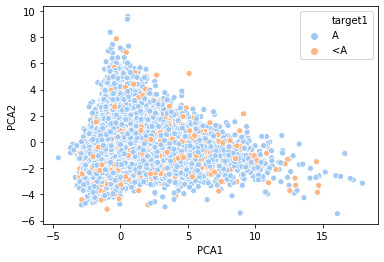

In [33]:
import seaborn as sns
sns.scatterplot(data=principalDf, x='PCA1', y='PCA2', hue='target1',
                legend='full', palette=sns.color_palette('pastel', n_colors=2))
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

* PCA1 and PCA2 do not separate out our predictor variable of A or not A, which shows our dataset may not yield a great model. However, this does not take our categorical variables into account

In [34]:
pca.explained_variance_ratio_

array([0.34076998, 0.15272853])

* Also out two principal components only explain about 49 % of the variation, so may have lost too much information in trying to make our data 2D to make the above statement 

## Correlation with target2?

In [35]:
target2 = df_pca.loc[:, 'grade']
target2.head()

0    A
1    A
2    A
4    F
5    A
Name: grade, dtype: category
Categories (5, object): [F < D < C < B < A]

In [36]:
principalDf['target2'] = target2
principalDf.head()

,PCA1,PCA2,target1,target2
0,-0.974608,-1.421364,A,A
1,2.306996,-0.981763,A,A
2,0.804924,-0.261825,A,A
3,-1.607961,-0.582261,NaN,NaN
4,-1.192235,-0.746334,<A,F


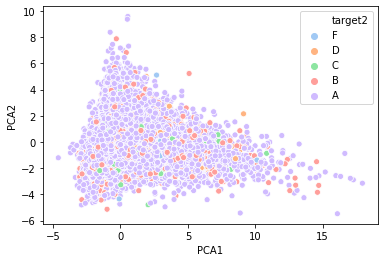

In [37]:
sns.scatterplot(data=principalDf, x='PCA1', y='PCA2', hue='target2',
                legend='full', palette=sns.color_palette('pastel', n_colors=5))
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

* Our two principal components do not seem to correlate with normal grade
either

### Correlation with target 3?

In [38]:
target3 = df_pca.loc[:, 'superuser']
target3.head()

0     True
1    False
2    False
4    False
5     True
Name: superuser, dtype: bool

In [39]:
principalDf['target3'] = target3
principalDf.head()

,PCA1,PCA2,target1,target2,target3
0,-0.974608,-1.421364,A,A,True
1,2.306996,-0.981763,A,A,False
2,0.804924,-0.261825,A,A,False
3,-1.607961,-0.582261,NaN,NaN,NaN
4,-1.192235,-0.746334,<A,F,False


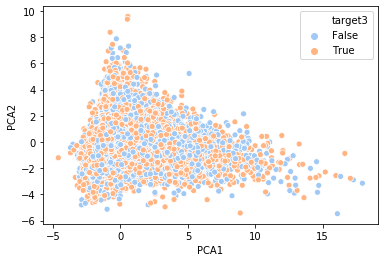

In [40]:
sns.scatterplot(data=principalDf, x='PCA1', y='PCA2', hue='target3',
                legend='full', palette=sns.color_palette('pastel', n_colors=2))
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

* Again, superuser does not seem to be separated out well by our first two principal components

# K Means Clustering

In [41]:
df_cluster = df_pca.copy()
df_cluster.head()

,accommodates,bathrooms,host_response_rate,number_of_reviews,bedrooms,beds,price,grade,grade_grouped,description_length,length_amenities,host_since_days,superuser
0,3,1.0,92.196878,2,1.0,1.0,1.611563,A,A,211,9,2179.0,True
1,7,1.0,100.000000,6,3.0,3.0,1.635086,A,A,1000,15,268.0,False
2,5,1.0,100.000000,10,1.0,3.0,1.604774,A,A,1000,19,505.0,False
4,2,1.0,100.000000,4,0.0,1.0,1.557077,F,<A,699,12,1109.0,False
5,2,1.0,100.000000,3,1.0,1.0,1.491251,A,A,1000,10,280.0,True


In [42]:
df_cluster_x = df_pca.drop(['grade', 'grade_grouped', 'superuser'], axis=1)

In [43]:
df_cluster_x.head()

,accommodates,bathrooms,host_response_rate,number_of_reviews,bedrooms,beds,price,description_length,length_amenities,host_since_days
0,3,1.0,92.196878,2,1.0,1.0,1.611563,211,9,2179.0
1,7,1.0,100.000000,6,3.0,3.0,1.635086,1000,15,268.0
2,5,1.0,100.000000,10,1.0,3.0,1.604774,1000,19,505.0
4,2,1.0,100.000000,4,0.0,1.0,1.557077,699,12,1109.0
5,2,1.0,100.000000,3,1.0,1.0,1.491251,1000,10,280.0


# Elbow Plot

In [44]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

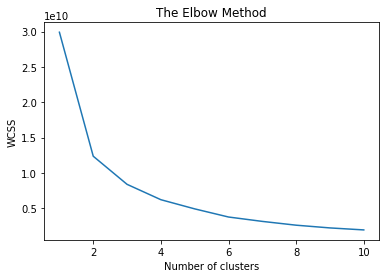

In [45]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(df_cluster_x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

* optimal k is two

## Getting two Kmeans clusters

In [46]:
kmeans = KMeans(n_clusters=2,init='k-means++',max_iter=300,n_init=10,random_state=0) 
clusters = kmeans.fit_predict(df_cluster_x)
clusters

array([1, 0, 0, ..., 0, 1, 1])

In [47]:
principalDf.head()

,PCA1,PCA2,target1,target2,target3
0,-0.974608,-1.421364,A,A,True
1,2.306996,-0.981763,A,A,False
2,0.804924,-0.261825,A,A,False
3,-1.607961,-0.582261,NaN,NaN,NaN
4,-1.192235,-0.746334,<A,F,False


In [48]:
principalDf['clusters'] = clusters

### Do clusters from K means separate out well in PCA plot?

In [49]:
principalDf.head()

,PCA1,PCA2,target1,target2,target3,clusters
0,-0.974608,-1.421364,A,A,True,1
1,2.306996,-0.981763,A,A,False,0
2,0.804924,-0.261825,A,A,False,0
3,-1.607961,-0.582261,NaN,NaN,NaN,0
4,-1.192235,-0.746334,<A,F,False,0


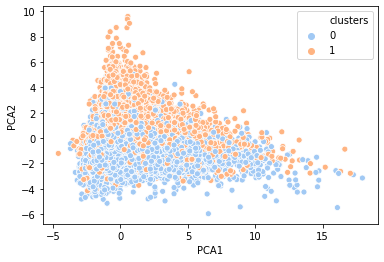

In [50]:
import seaborn as sns
sns.scatterplot(data=principalDf, x='PCA1', y='PCA2', hue='clusters',
                legend='full', palette=sns.color_palette('pastel', n_colors=2))
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

* The clusters do seem to separate out when looking at the PCA plot!

# Interpret KMeans Clusters

In [51]:
#create new dataframe 
df_explore = df_imputed.copy()

In [52]:
df_imputed.head()

,room_type,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,host_has_profile_pic,host_identity_verified,host_response_rate,instant_bookable,number_of_reviews,bedrooms,beds,price,grade,grade_grouped,superuser,description_length,length_amenities,internet,TV,air_conditioning,kitchen,pool,parking,host_since_days
0,Entire home/apt,3,1.0,Real Bed,strict,True,NYC,t,t,92.196878,f,2,1.0,1.0,1.611563,A,A,True,211,9,True,False,True,True,False,False,2179.0
1,Entire home/apt,7,1.0,Real Bed,strict,True,NYC,t,f,100.000000,t,6,3.0,3.0,1.635086,A,A,False,1000,15,True,False,True,True,False,False,268.0
2,Entire home/apt,5,1.0,Real Bed,moderate,True,NYC,t,t,100.000000,t,10,1.0,3.0,1.604774,A,A,False,1000,19,True,True,True,True,False,False,505.0
4,Entire home/apt,2,1.0,Real Bed,moderate,True,DC,t,t,100.000000,t,4,0.0,1.0,1.557077,F,<A,False,699,12,True,True,True,True,False,False,1109.0
5,Private room,2,1.0,Real Bed,strict,True,SF,t,t,100.000000,t,3,1.0,1.0,1.491251,A,A,True,1000,10,True,True,False,False,False,False,280.0


In [53]:
df_explore['clusters'] = clusters

In [54]:
df_explore.head()

,room_type,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,host_has_profile_pic,host_identity_verified,host_response_rate,instant_bookable,number_of_reviews,bedrooms,beds,price,grade,grade_grouped,superuser,description_length,length_amenities,internet,TV,air_conditioning,kitchen,pool,parking,host_since_days,clusters
0,Entire home/apt,3,1.0,Real Bed,strict,True,NYC,t,t,92.196878,f,2,1.0,1.0,1.611563,A,A,True,211,9,True,False,True,True,False,False,2179.0,1
1,Entire home/apt,7,1.0,Real Bed,strict,True,NYC,t,f,100.000000,t,6,3.0,3.0,1.635086,A,A,False,1000,15,True,False,True,True,False,False,268.0,0
2,Entire home/apt,5,1.0,Real Bed,moderate,True,NYC,t,t,100.000000,t,10,1.0,3.0,1.604774,A,A,False,1000,19,True,True,True,True,False,False,505.0,0
4,Entire home/apt,2,1.0,Real Bed,moderate,True,DC,t,t,100.000000,t,4,0.0,1.0,1.557077,F,<A,False,699,12,True,True,True,True,False,False,1109.0,0
5,Private room,2,1.0,Real Bed,strict,True,SF,t,t,100.000000,t,3,1.0,1.0,1.491251,A,A,True,1000,10,True,True,False,False,False,False,280.0,0


In [55]:
#There are two clusters with the value counts below
df_explore['clusters'].value_counts()

0    33526
1    23708
Name: clusters, dtype: int64

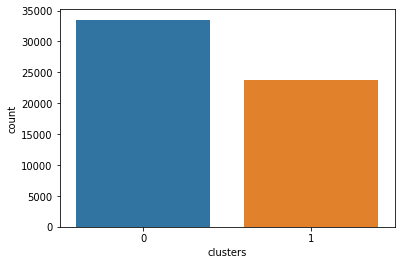

In [56]:
#Countplot of the clusters
sns.countplot(data=df_explore, x='clusters')
plt.show()

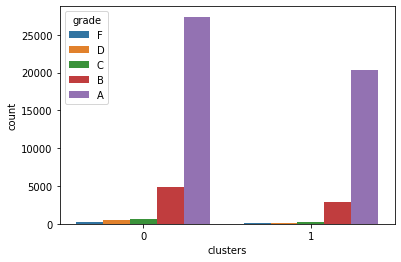

In [57]:
sns.countplot(data=df_explore, x='clusters', hue='grade')
plt.show()

* Like what we saw from PCA, grade seems to be represented equally well in both clusters. This implies that our KMeans clusters will not be a good predictor to add to our model

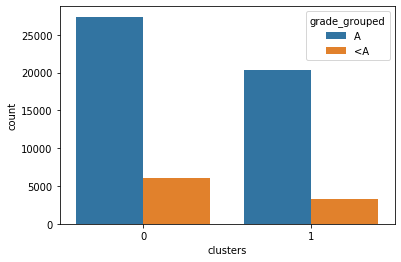

In [58]:
sns.countplot(data=df_explore, x='clusters', hue='grade_grouped')
plt.show()

* The same applies for our grade grouped variable

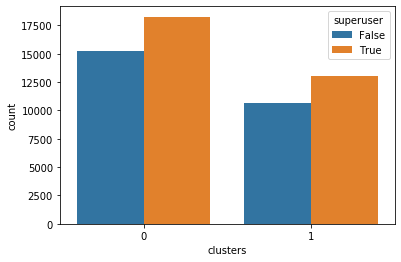

In [59]:
sns.countplot(data=df_explore, x='clusters', hue='superuser')
plt.show()

* The same applies for superuser

# Cluster EDA

### Clusters and numerical variables

In [60]:
numerics = list(df_explore.select_dtypes(include=['int64', 'float64']).columns)
numerics

['accommodates',
 'bathrooms',
 'host_response_rate',
 'number_of_reviews',
 'bedrooms',
 'beds',
 'price',
 'description_length',
 'length_amenities',
 'host_since_days']

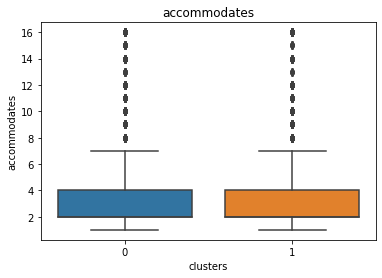

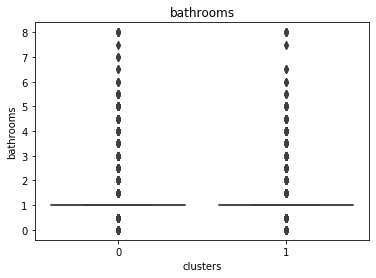

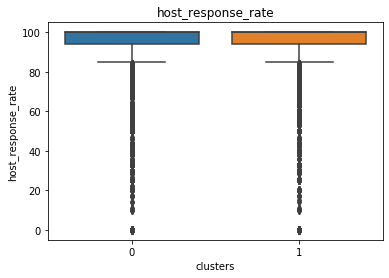

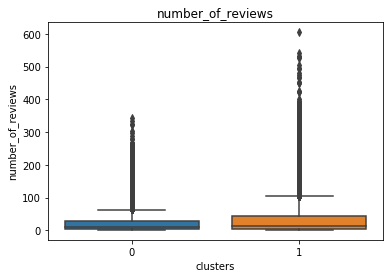

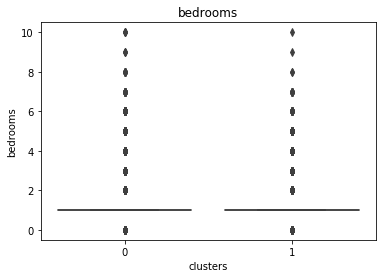

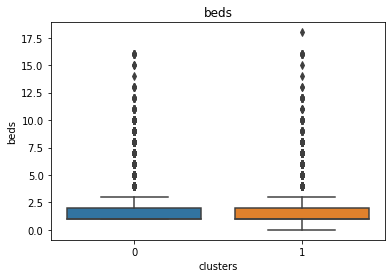

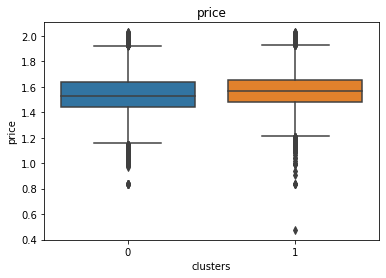

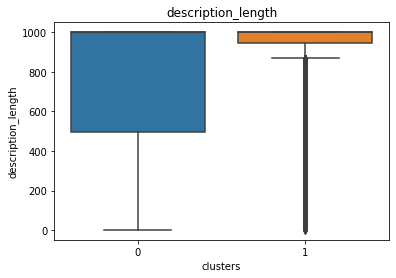

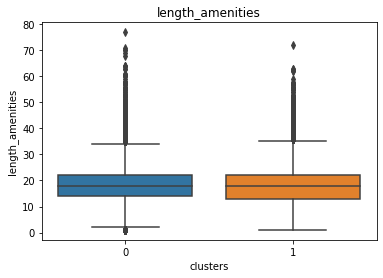

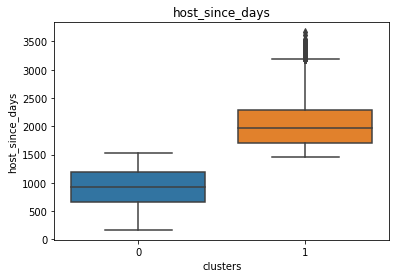

In [61]:
for x in numerics:
    sns.boxplot(data=df_explore, x='clusters', y=x)
    plt.title(x)
    plt.show()

* Cluster 1 seems to include AirBnb users that have been:
    1. longer hosts
    2. have longer description lengths
    3. have more reviews
    

### Clusters and categorical variables

In [62]:
df_explore.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57234 entries, 0 to 74110
Data columns (total 28 columns):
room_type                 57234 non-null object
accommodates              57234 non-null int64
bathrooms                 57234 non-null float64
bed_type                  57234 non-null object
cancellation_policy       57234 non-null object
cleaning_fee              57234 non-null bool
city                      57234 non-null object
host_has_profile_pic      57234 non-null object
host_identity_verified    57234 non-null object
host_response_rate        57234 non-null float64
instant_bookable          57234 non-null object
number_of_reviews         57234 non-null int64
bedrooms                  57234 non-null float64
beds                      57234 non-null float64
price                     57234 non-null float64
grade                     57234 non-null category
grade_grouped             57234 non-null object
superuser                 57234 non-null bool
description_length        

In [63]:
def make_percent_stacked_boxplot(x):
    '''make a percent stacked barplot where the clusters are the x axis
    and the categorical variable is the y axis'''
    table = pd.crosstab(df_explore['clusters'], df_explore[x], normalize='index')
    table.plot(kind='bar', stacked=True)
    plt.show()

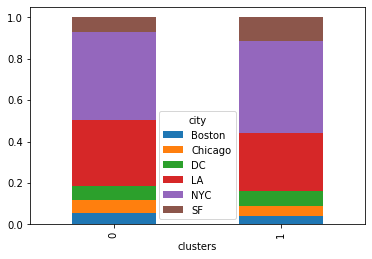

In [64]:
make_percent_stacked_boxplot('city')

In [65]:
categoricals = list(df_explore.select_dtypes(['object', 'bool', 'category']).columns)

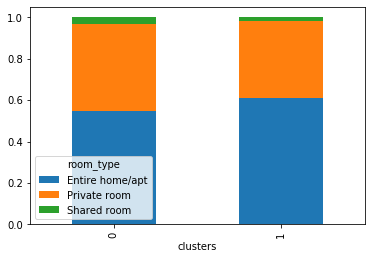

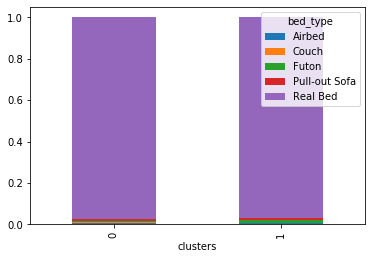

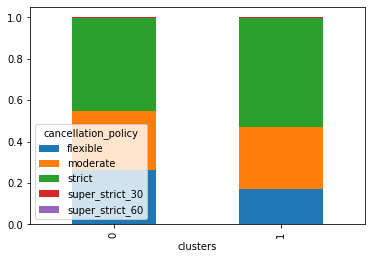

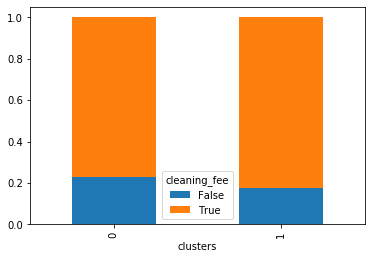

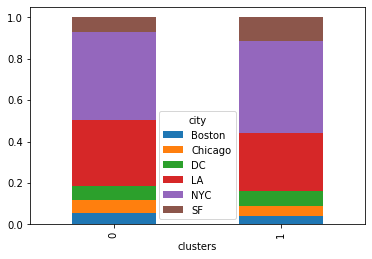

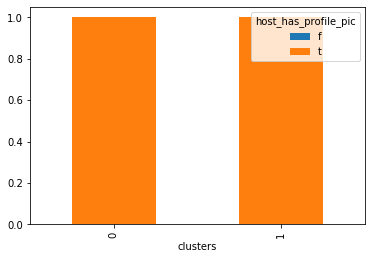

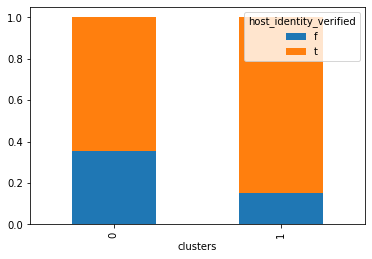

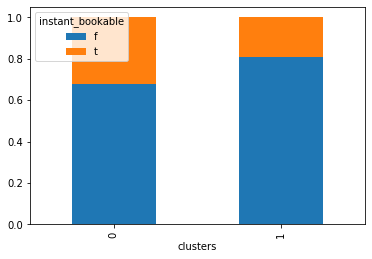

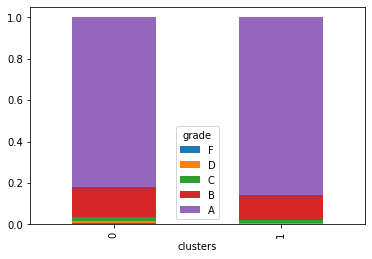

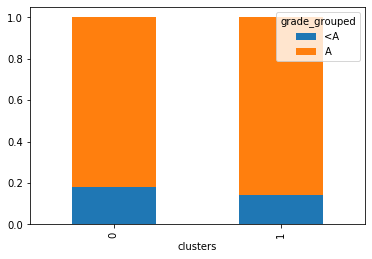

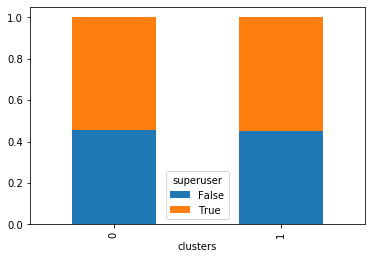

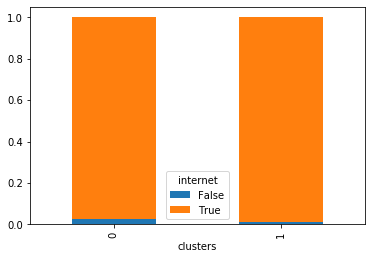

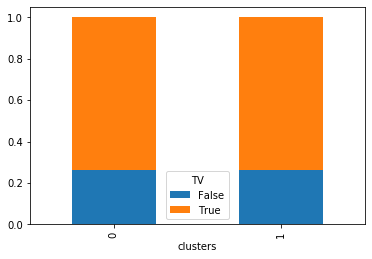

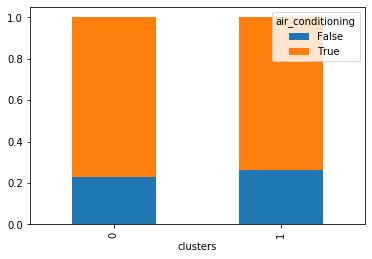

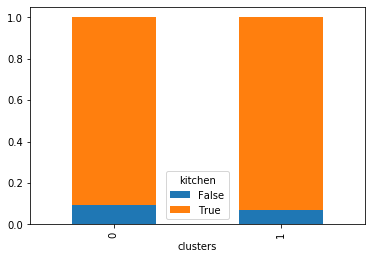

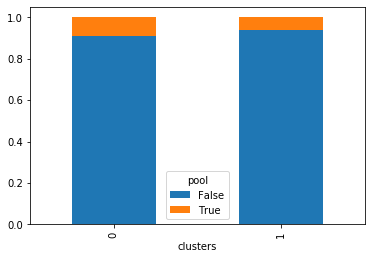

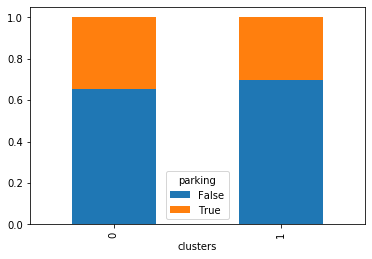

In [66]:
for x in categoricals:
    make_percent_stacked_boxplot(x)

* Out clusters do not seem to seperate out with categorical variables very well
* this makes sense because we could not use categorical variables in the clustering process
* weirdly, the only differences that seem significant is that cluster 1 contains properties that overall are 
    1. less likely to be instant bookable
    2. more likely to have their identity verified
* We also saw that cluster 1 contained hosts that had been using AirBnB for longer, so these may be traits of long time AirBnb users

# DBSCAN

In [67]:
df_cluster.head()

,accommodates,bathrooms,host_response_rate,number_of_reviews,bedrooms,beds,price,grade,grade_grouped,description_length,length_amenities,host_since_days,superuser
0,3,1.0,92.196878,2,1.0,1.0,1.611563,A,A,211,9,2179.0,True
1,7,1.0,100.000000,6,3.0,3.0,1.635086,A,A,1000,15,268.0,False
2,5,1.0,100.000000,10,1.0,3.0,1.604774,A,A,1000,19,505.0,False
4,2,1.0,100.000000,4,0.0,1.0,1.557077,F,<A,699,12,1109.0,False
5,2,1.0,100.000000,3,1.0,1.0,1.491251,A,A,1000,10,280.0,True


In [68]:
#create feature dataframe without label variables
X = df_cluster.drop(['grade', 'grade_grouped'], axis=1)

In [69]:
#scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [70]:
#normalize the data to make follow a normal distribution
from sklearn.preprocessing import normalize 
X_normalized = normalize(X_scaled) 

In [71]:
#grab the names of the original dataframe
names = list(df_cluster.columns)
names.remove('grade')
names.remove('grade_grouped')
names

['accommodates',
 'bathrooms',
 'host_response_rate',
 'number_of_reviews',
 'bedrooms',
 'beds',
 'price',
 'description_length',
 'length_amenities',
 'host_since_days',
 'superuser']

In [72]:
#convert np array back to dataframe
X_normalized = pd.DataFrame(X_normalized , columns=names) 
X_normalized.head()

,accommodates,bathrooms,host_response_rate,number_of_reviews,bedrooms,beds,price,description_length,length_amenities,host_since_days,superuser
0,-0.032584,-0.128279,-0.078726,-0.193771,-0.098879,-0.185736,0.143357,-0.673627,-0.431772,0.386900,0.289861
1,0.471548,-0.107749,0.104632,-0.136677,0.552698,0.266699,0.165086,0.171308,-0.130234,-0.446984,-0.294015
2,0.345384,-0.167567,0.162719,-0.171992,-0.129162,0.414760,0.167214,0.266411,0.038449,-0.546243,-0.457240
3,-0.233517,-0.165426,0.160641,-0.229862,-0.615546,-0.239522,0.026013,-0.168734,-0.378378,-0.164667,-0.451399
4,-0.214659,-0.152067,0.147668,-0.220502,-0.117215,-0.220180,-0.152511,0.241768,-0.457169,-0.623991,0.343615


In [73]:
#perform PCA for visualization
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(X_normalized) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 
print(X_principal.head()) 

         P1        P2
0 -0.248775  0.025799
1  0.649466  0.422858
2  0.409491  0.432438
3 -0.588114  0.464313
4 -0.437839 -0.240410


In [74]:
#fit the DBSCAN clustering on our PCA
from sklearn.cluster import DBSCAN 
db_default = DBSCAN(eps = 0.0375, min_samples = 3).fit(X_principal) 
labels = db_default.labels_ 
labels

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [75]:
#DBSCAN found 6 clusters
np.unique(labels)

array([-1,  0], dtype=int64)

In [76]:
#Build label to color mapping
color_map = {-1:'blue', 0:'green', 1:'black', 2:'purple', 3:'red', 4:'yellow'}

In [77]:
label_colors = np.vectorize(color_map.get)(labels)
label_colors

array(['green', 'green', 'green', ..., 'green', 'green', 'green'],
      dtype='<U5')

In [78]:
X_principal['labels'] = labels

In [79]:
X_principal['label_colors'] = label_colors

In [80]:
X_principal.head()

,P1,P2,labels,label_colors
0,-0.248775,0.025799,0,green
1,0.649466,0.422858,0,green
2,0.409491,0.432438,0,green
3,-0.588114,0.464313,0,green
4,-0.437839,-0.240410,0,green


In [81]:
import seaborn as sns

In [82]:
sns.scatterplot(data=X_principal, x='P1', y='P2', hue='labels',
                legend='full', palette=sns.color_palette('pastel', n_colors=6))
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

ValueError: The palette list has the wrong number of colors.

In [ ]:
#NOTE: FIT DBSCAN ON OUR PRINCIPAL COMPONENTS AND NOT ON OUR DATA
#(OPPOSITE OF ABOVE)

# Experiment with DBSCAN

In [ ]:
#Fit DBSCAN on data and not principal components
from sklearn.cluster import DBSCAN 
db_default = DBSCAN(eps = 0.0375, min_samples = 3).fit(X_normalized) 
labels = db_default.labels_ 
labels

In [ ]:
np.unique(labels) #58 clusters

In [ ]:
del X_principal['labels']
del X_principal['label_colors']

In [ ]:
X_principal.head()

In [ ]:
X_principal['labels'] = labels

In [ ]:
X_principal.head()

In [ ]:
#MESS
sns.scatterplot(data=X_principal, x='P1', y='P2', hue='labels',
                legend='full', palette=sns.color_palette('pastel', n_colors=58))
plt.legend(bbox_to_anchor=(1, 1))
plt.show()